# Super Store Sales Analysis

**Questions need to Answer-**

- What is the overall sales trend?

- Which are the Top 10 products by sales?

- Which are the Most Selling Products?

- Which is the most preferred Ship Mode?

- Which are the Most Profitable Category and Sub-Category?

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [14]:
#data import
df = pd.read_excel('superstore_sales.xlsx')

In [15]:
#check missing values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [16]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


### What is the overall sales trend?

In [17]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [18]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [19]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [20]:
df['month_year']= df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [28]:
df_monthly_trend = df.groupby('month_year').sum()['sales'].reset_index()

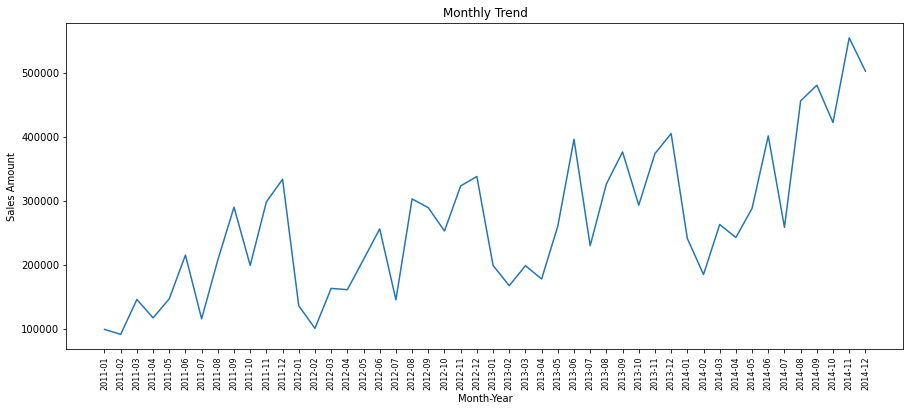

In [37]:
plt.figure(figsize=(15,6))
plt.xlabel('Month-Year')
plt.ylabel('Sales Amount')
plt.title('Monthly Trend')
plt.plot(df_monthly_trend['month_year'],df_monthly_trend['sales'])
plt.xticks(rotation='vertical',size=8)
plt.show()

We can see from the graph that, the company struggled at first 7 months and over the period couple of times. But also the sales are increasing over the time. So the company is growing.

### Which are the top 10 products by sale?

In [42]:
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])
prod_sales = prod_sales.sort_values('sales',ascending=False)

In [43]:
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


### Which are the most Selling product?(top 10)

In [51]:
most_sold = pd.DataFrame(df.groupby('product_name').sum()['quantity'])
most_sold = most_sold.sort_values('quantity',ascending = False)
most_sold[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


### What is the most preferred ship mode?

C:\Users\sujon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


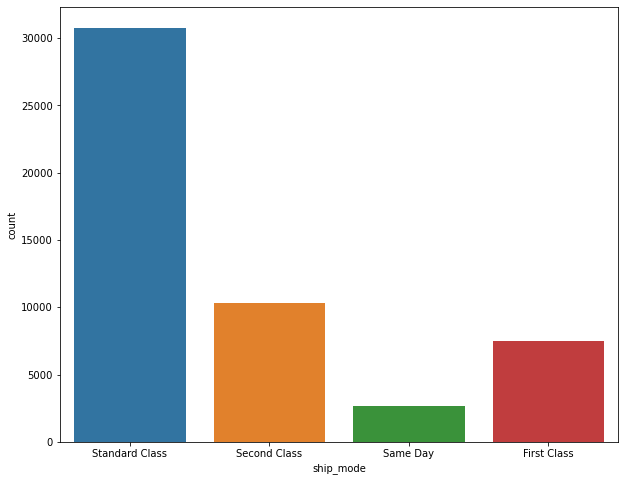

In [57]:
plt.figure(figsize=(10,8))
sns.countplot(df['ship_mode'])
plt.show()

### Which is the most profitable Category and Sub-Category?

In [64]:
most_prof = pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])
most_prof.sort_values(['category','profit'],ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870